In [ ]:
# installing CSV package
using Pkg; Pkg.add("CSV")

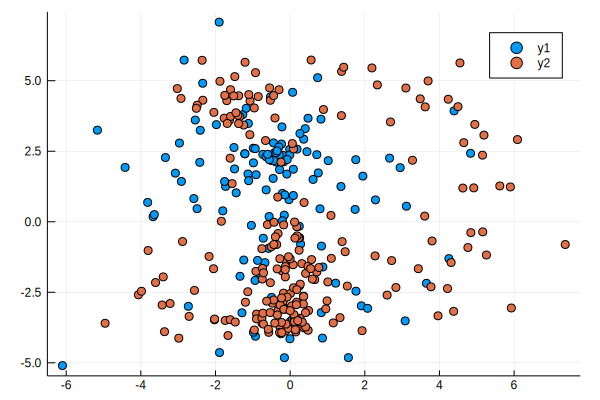

In [4]:
using CSV, LinearAlgebra, Plots, Statistics 

d = CSV.read("/home/jkm/Desktop/ionosphere.csv")

# extracting features 
# the second dimension is useless as you can verify by printing d
X = convert(Matrix,[d[1] d[3:34]])

# data standardisation
X = (X - repeat(mean(X,dims=1),351,1)) ./ repeat(std(X,dims=1), 351, 1)

# converting label into binary vector (true/false)
Y = d[35] .== "g"

V = cov(X)       # computing covariance matrix
A = eigvecs(V)   # computing eigenvectors
λ = eigvals(V)   # computing eigenvalues


# data projection
P = X * A[:,[32,33]] 

# plotting the projected data
scatter(P[Y.==false,1], P[Y.==false,2])
scatter!(P[Y.==true,1], P[Y.==true, 2])